Organization : Cyclistic
Report By: Adrian Onsare
Designation: Data Analyst

This notebook presents the analysis of Bike Sharing data for the Cyclistic Bike Sharing Analysis, as part of the requirement to obtain the Google Data Analytics Certification.  
The datasets used are monthly trip data sets contained within 32 zip files obtained from [this source]( https://divvy-tripdata.s3.amazonaws.com/index.html). The dataset is public

Cyclisitc was founded in 2016, and since then, the fleet  has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

There exist three pricing plans: single-ride passes,full-day passes and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Financial analysis has shown that the annual memberships model is far more profitable than the casual rider model. However, most customers choose the ride option.

The sales manager has established that maximizing the number of annual members is the optimal growth strategy; particularly given that brand awareness is already good.

The marketing strategy can be effectively designed by asking the following questions:

In order to do this, 3 key questions must be answered:

* **How do annual members and casual riders use Cyclistic bikes differently?**
* Why would Casual riders buy Cyclistic annual memberships?
* How can Cyclistic use digital media to influence Casual riders to become members?

The analysis concerns itself with answering the first question(in bold)

## Loading Required Libraries

In [1]:
# install packages
install.packages('tidyverse')
install.packages('dplyr')
install.packages('ggplot2')
install.packages('lubridate')
install.packages('plotly')




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rlang’, ‘tibble’, ‘vctrs’


Warning message in install.packages("dplyr"):
“installation of package ‘rlang’ had non-zero exit status”
Warning message in install.packages("dplyr"):
“installation of package ‘vctrs’ had non-zero exit status”
Warning message in install.packages("dplyr"):
“installation of package ‘tibble’ had non-zero exit status”
Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Loading packages

In [2]:
setwd("/kaggle/input/cyclistic-bike")

In [3]:
#load packages
library(tidyverse)
library(dplyr)
library(ggplot2)
library(lubridate)
library(data.table)
library(plotly)
options(warn = -1)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘pa

## Reading in a sample of the datasets before combining into 1 dataframe

In [4]:
# picking 2 random datasets

bike_1 <- read_csv("202004-divvy-tripdata/202004-divvy-tripdata.csv")
bike_2 <- read_csv("202009-divvy-tripdata/202009-divvy-tripdata.csv")

Rows: 84776 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): ride_id, rideable_type, start_station_name, end_station_name, memb...
dbl  (6): start_station_id, end_station_id, start_lat, start_lng, end_lat, e...
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 532958 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): ride_id, rideable_type, start_station_name, end_station_name, memb...
dbl  (6): start_station_id, end_station_id, start_lat, start_lng, end_lat, e...
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
spec(bike_1)
spec(bike_2)

cols(
  ride_id = col_character(),
  rideable_type = col_character(),
  started_at = col_datetime(format = ""),
  ended_at = col_datetime(format = ""),
  start_station_name = col_character(),
  start_station_id = col_double(),
  end_station_name = col_character(),
  end_station_id = col_double(),
  start_lat = col_double(),
  start_lng = col_double(),
  end_lat = col_double(),
  end_lng = col_double(),
  member_casual = col_character()
)

cols(
  ride_id = col_character(),
  rideable_type = col_character(),
  started_at = col_datetime(format = ""),
  ended_at = col_datetime(format = ""),
  start_station_name = col_character(),
  start_station_id = col_double(),
  end_station_name = col_character(),
  end_station_id = col_double(),
  start_lat = col_double(),
  start_lng = col_double(),
  end_lat = col_double(),
  end_lng = col_double(),
  member_casual = col_character()
)

From the foregoing, the column names, number of columns and datatypes are similar, hence the 32 datasets can be concatenated into a single dataframe

### Combining Datasets

In [6]:
#Read in csv files for the last 12 months into an r dataframe object
df <- 
  tail(list.files( recursive=TRUE),12) %>% 
  map_df(~fread(.))


In [7]:
# df<- data.frame(df)

In [8]:
glimpse(df)#checking column data types
head(df)#NA values found

Rows: 5,829,084
Columns: 13
$ ride_id            <chr> "47EC0A7F82E65D52", "8494861979B0F477", "EFE527AF80…
$ rideable_type      <chr> "classic_bike", "electric_bike", "classic_bike", "c…
$ started_at         <dttm> 2022-03-21 13:45:01, 2022-03-16 09:37:16, 2022-03-…
$ ended_at           <dttm> 2022-03-21 13:51:18, 2022-03-16 09:43:34, 2022-03-…
$ start_station_name <chr> "Wabash Ave & Wacker Pl", "Michigan Ave & Oak St", …
$ start_station_id   <chr> "TA1307000131", "13042", "13109", "TA1307000131", "…
$ end_station_name   <chr> "Kingsbury St & Kinzie St", "Orleans St & Chestnut …
$ end_station_id     <chr> "KA1503000043", "620", "15578", "TA1305000025", "13…
$ start_lat          <dbl> 41.88688, 41.90100, 41.97835, 41.88688, 41.91172, 4…
$ start_lng          <dbl> -87.62603, -87.62375, -87.65975, -87.62603, -87.626…
$ end_lat            <dbl> 41.88918, 41.89820, 41.98404, 41.87771, 41.87794, 4…
$ end_lng            <dbl> -87.63851, -87.63754, -87.66027, -87.63532, -87.662…
$ member_cas

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
47EC0A7F82E65D52,classic_bike,2022-03-21 13:45:01,2022-03-21 13:51:18,Wabash Ave & Wacker Pl,TA1307000131,Kingsbury St & Kinzie St,KA1503000043,41.88688,-87.62603,41.88918,-87.63851,member
8494861979B0F477,electric_bike,2022-03-16 09:37:16,2022-03-16 09:43:34,Michigan Ave & Oak St,13042,Orleans St & Chestnut St (NEXT Apts),620,41.90100,-87.62375,41.89820,-87.63754,member
EFE527AF80B66109,classic_bike,2022-03-23 19:52:02,2022-03-23 19:54:48,Broadway & Berwyn Ave,13109,Broadway & Ridge Ave,15578,41.97835,-87.65975,41.98404,-87.66027,member
9F446FD9DEE3F389,classic_bike,2022-03-01 19:12:26,2022-03-01 19:22:14,Wabash Ave & Wacker Pl,TA1307000131,Franklin St & Jackson Blvd,TA1305000025,41.88688,-87.62603,41.87771,-87.63532,member
431128AD9AFFEDC0,classic_bike,2022-03-21 18:37:01,2022-03-21 19:19:11,DuSable Lake Shore Dr & North Blvd,LF-005,Loomis St & Jackson Blvd,13206,41.91172,-87.62680,41.87794,-87.66201,member
9AA8A13AF7A85325,classic_bike,2022-03-07 17:10:22,2022-03-07 17:15:04,Bissell St & Armitage Ave,13059,Southport Ave & Clybourn Ave,TA1309000030,41.91802,-87.65218,41.92077,-87.66371,member


In [9]:
colnames(df)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

## Data Preparation

In [10]:
count(df, is.na(df$ride_id))
count(df, is.na(df$rideable_type))
count(df, is.na(df$start_station_name))
count(df, is.na(df$end_station_name))
count(df, is.na(df$started_at))
count(df, is.na(df$ended_at))
count(df, is.na(df$member_casual))

is.na(df$ride_id),n
<lgl>,<int>
FALSE,5829084


is.na(df$rideable_type),n
<lgl>,<int>
FALSE,5829084


is.na(df$start_station_name),n
<lgl>,<int>
FALSE,5829084


is.na(df$end_station_name),n
<lgl>,<int>
FALSE,5829084


is.na(df$started_at),n
<lgl>,<int>
FALSE,5829084


is.na(df$ended_at),n
<lgl>,<int>
FALSE,5829084


is.na(df$member_casual),n
<lgl>,<int>
FALSE,5829084


The columns of interest have no missing values

### Adding ride_length column

In [11]:
#### Calculating ride_length by subtracting started_at from ended_at
df <- mutate(df, ride_length= ended_at - started_at)
glimpse(df)
head(df)

Rows: 5,829,084
Columns: 14
$ ride_id            <chr> "47EC0A7F82E65D52", "8494861979B0F477", "EFE527AF80…
$ rideable_type      <chr> "classic_bike", "electric_bike", "classic_bike", "c…
$ started_at         <dttm> 2022-03-21 13:45:01, 2022-03-16 09:37:16, 2022-03-…
$ ended_at           <dttm> 2022-03-21 13:51:18, 2022-03-16 09:43:34, 2022-03-…
$ start_station_name <chr> "Wabash Ave & Wacker Pl", "Michigan Ave & Oak St", …
$ start_station_id   <chr> "TA1307000131", "13042", "13109", "TA1307000131", "…
$ end_station_name   <chr> "Kingsbury St & Kinzie St", "Orleans St & Chestnut …
$ end_station_id     <chr> "KA1503000043", "620", "15578", "TA1305000025", "13…
$ start_lat          <dbl> 41.88688, 41.90100, 41.97835, 41.88688, 41.91172, 4…
$ start_lng          <dbl> -87.62603, -87.62375, -87.65975, -87.62603, -87.626…
$ end_lat            <dbl> 41.88918, 41.89820, 41.98404, 41.87771, 41.87794, 4…
$ end_lng            <dbl> -87.63851, -87.63754, -87.66027, -87.63532, -87.662…
$ member_cas

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<drtn>
47EC0A7F82E65D52,classic_bike,2022-03-21 13:45:01,2022-03-21 13:51:18,Wabash Ave & Wacker Pl,TA1307000131,Kingsbury St & Kinzie St,KA1503000043,41.88688,-87.62603,41.88918,-87.63851,member,377 secs
8494861979B0F477,electric_bike,2022-03-16 09:37:16,2022-03-16 09:43:34,Michigan Ave & Oak St,13042,Orleans St & Chestnut St (NEXT Apts),620,41.90100,-87.62375,41.89820,-87.63754,member,378 secs
EFE527AF80B66109,classic_bike,2022-03-23 19:52:02,2022-03-23 19:54:48,Broadway & Berwyn Ave,13109,Broadway & Ridge Ave,15578,41.97835,-87.65975,41.98404,-87.66027,member,166 secs
9F446FD9DEE3F389,classic_bike,2022-03-01 19:12:26,2022-03-01 19:22:14,Wabash Ave & Wacker Pl,TA1307000131,Franklin St & Jackson Blvd,TA1305000025,41.88688,-87.62603,41.87771,-87.63532,member,588 secs
431128AD9AFFEDC0,classic_bike,2022-03-21 18:37:01,2022-03-21 19:19:11,DuSable Lake Shore Dr & North Blvd,LF-005,Loomis St & Jackson Blvd,13206,41.91172,-87.62680,41.87794,-87.66201,member,2530 secs
9AA8A13AF7A85325,classic_bike,2022-03-07 17:10:22,2022-03-07 17:15:04,Bissell St & Armitage Ave,13059,Southport Ave & Clybourn Ave,TA1309000030,41.91802,-87.65218,41.92077,-87.66371,member,282 secs


**Add new columns indicating month,weekday and hour temporal scopes**

In [12]:
df$weekday <- weekdays(df$started_at)
df$month <- month(df$started_at)

df$hour <- hour(df$started_at)
head(df)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,weekday,month,hour
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<drtn>,<chr>,<int>,<int>
47EC0A7F82E65D52,classic_bike,2022-03-21 13:45:01,2022-03-21 13:51:18,Wabash Ave & Wacker Pl,TA1307000131,Kingsbury St & Kinzie St,KA1503000043,41.88688,-87.62603,41.88918,-87.63851,member,377 secs,Monday,3,13
8494861979B0F477,electric_bike,2022-03-16 09:37:16,2022-03-16 09:43:34,Michigan Ave & Oak St,13042,Orleans St & Chestnut St (NEXT Apts),620,41.90100,-87.62375,41.89820,-87.63754,member,378 secs,Wednesday,3,9
EFE527AF80B66109,classic_bike,2022-03-23 19:52:02,2022-03-23 19:54:48,Broadway & Berwyn Ave,13109,Broadway & Ridge Ave,15578,41.97835,-87.65975,41.98404,-87.66027,member,166 secs,Wednesday,3,19
9F446FD9DEE3F389,classic_bike,2022-03-01 19:12:26,2022-03-01 19:22:14,Wabash Ave & Wacker Pl,TA1307000131,Franklin St & Jackson Blvd,TA1305000025,41.88688,-87.62603,41.87771,-87.63532,member,588 secs,Tuesday,3,19
431128AD9AFFEDC0,classic_bike,2022-03-21 18:37:01,2022-03-21 19:19:11,DuSable Lake Shore Dr & North Blvd,LF-005,Loomis St & Jackson Blvd,13206,41.91172,-87.62680,41.87794,-87.66201,member,2530 secs,Monday,3,18
9AA8A13AF7A85325,classic_bike,2022-03-07 17:10:22,2022-03-07 17:15:04,Bissell St & Armitage Ave,13059,Southport Ave & Clybourn Ave,TA1309000030,41.91802,-87.65218,41.92077,-87.66371,member,282 secs,Monday,3,17


Another interesting perspective would be to zone the time of day into morning,afternoon, evening and night, based on the time of day(hour)

The same is done for seasons, based on the month of the year.See below:

In [13]:
#time of day to day period
df$day_period <- ifelse(df$hour >= 0 & df$hour <= 6, "Dawn",
            ifelse(df$hour > 6 & df$hour <= 12, "Morning",
            ifelse(df$hour > 12 & df$hour <= 16, "Afternoon",
            ifelse(df$hour > 16 & df$hour <= 19, "Evening",
                   "Night"))))
#month to season
df$season <- ifelse(df$month == 12 | df$month == 1 | df$month == 2, "Winter",
            ifelse(df$month == 3 | df$month == 4 | df$month == 5, "Spring",
            ifelse(df$month == 6 | df$month == 7 | df$month == 8, "Summer", "Fall")))


In [14]:
head(df)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,weekday,month,hour,day_period,season
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<drtn>,<chr>,<int>,<int>,<chr>,<chr>
47EC0A7F82E65D52,classic_bike,2022-03-21 13:45:01,2022-03-21 13:51:18,Wabash Ave & Wacker Pl,TA1307000131,Kingsbury St & Kinzie St,KA1503000043,41.88688,-87.62603,41.88918,-87.63851,member,377 secs,Monday,3,13,Afternoon,Spring
8494861979B0F477,electric_bike,2022-03-16 09:37:16,2022-03-16 09:43:34,Michigan Ave & Oak St,13042,Orleans St & Chestnut St (NEXT Apts),620,41.90100,-87.62375,41.89820,-87.63754,member,378 secs,Wednesday,3,9,Morning,Spring
EFE527AF80B66109,classic_bike,2022-03-23 19:52:02,2022-03-23 19:54:48,Broadway & Berwyn Ave,13109,Broadway & Ridge Ave,15578,41.97835,-87.65975,41.98404,-87.66027,member,166 secs,Wednesday,3,19,Evening,Spring
9F446FD9DEE3F389,classic_bike,2022-03-01 19:12:26,2022-03-01 19:22:14,Wabash Ave & Wacker Pl,TA1307000131,Franklin St & Jackson Blvd,TA1305000025,41.88688,-87.62603,41.87771,-87.63532,member,588 secs,Tuesday,3,19,Evening,Spring
431128AD9AFFEDC0,classic_bike,2022-03-21 18:37:01,2022-03-21 19:19:11,DuSable Lake Shore Dr & North Blvd,LF-005,Loomis St & Jackson Blvd,13206,41.91172,-87.62680,41.87794,-87.66201,member,2530 secs,Monday,3,18,Evening,Spring
9AA8A13AF7A85325,classic_bike,2022-03-07 17:10:22,2022-03-07 17:15:04,Bissell St & Armitage Ave,13059,Southport Ave & Clybourn Ave,TA1309000030,41.91802,-87.65218,41.92077,-87.66371,member,282 secs,Monday,3,17,Evening,Spring


change ride_length from seconds to minutes

In [15]:
# df <- mutate(df, ride_length_ms = seconds_to_period(ride_length))
# glimpse(df)
# head(df)

It is sometimes possible to have erroneous temporal data .i.e in some instances, the start time may be recorced as coming later than the end_time. This can be checked by sorting the dataframe by the ride_length in ascending order as below:

In [16]:
# sort by ride_length
# df_arr <- df %>%
# arrange(ride_length )
# head(df_arr)

Count of values of ride length less than zero

In [17]:

# sum(df_arr$ride_length_ms <0)

The rows with negative ride duration are dropped from the dataset in order to eliminate inaccuracies


In [18]:
df <- df%>% 
  filter(ride_length>0)

For easier comprehension, some columns are renamed. See below:

In [19]:
df <- rename(df, member_class = member_casual, bike_type = rideable_type, 
                      ride_end = ended_at, ride_start = started_at, 
                      duration_secs = ride_length)

In [20]:
df$duration_min <- as.numeric(as.character(df$duration_secs))/60

## Data Analysis & Visualization

At this stage, the data is already cleaned and prepared.As such,the next step is data analysis and visualization.

In this stage, the data is aggregated, visualized and conclusions drawn.

The following aspects were investigated:
* Count of bike types used
* Count of rides for each category
* Bike types used for each member category
* Number of weekday rides for each member category
* Number of rides for each member category for each day period
* Number of rides for each member category for each Season
* Median duration for each member category
* Median duration for each member category for each weekday

In [21]:
head(df)

ride_id,bike_type,ride_start,ride_end,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_class,duration_secs,weekday,month,hour,day_period,season,duration_min
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<drtn>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>
47EC0A7F82E65D52,classic_bike,2022-03-21 13:45:01,2022-03-21 13:51:18,Wabash Ave & Wacker Pl,TA1307000131,Kingsbury St & Kinzie St,KA1503000043,41.88688,-87.62603,41.88918,-87.63851,member,377 secs,Monday,3,13,Afternoon,Spring,6.283333
8494861979B0F477,electric_bike,2022-03-16 09:37:16,2022-03-16 09:43:34,Michigan Ave & Oak St,13042,Orleans St & Chestnut St (NEXT Apts),620,41.90100,-87.62375,41.89820,-87.63754,member,378 secs,Wednesday,3,9,Morning,Spring,6.300000
EFE527AF80B66109,classic_bike,2022-03-23 19:52:02,2022-03-23 19:54:48,Broadway & Berwyn Ave,13109,Broadway & Ridge Ave,15578,41.97835,-87.65975,41.98404,-87.66027,member,166 secs,Wednesday,3,19,Evening,Spring,2.766667
9F446FD9DEE3F389,classic_bike,2022-03-01 19:12:26,2022-03-01 19:22:14,Wabash Ave & Wacker Pl,TA1307000131,Franklin St & Jackson Blvd,TA1305000025,41.88688,-87.62603,41.87771,-87.63532,member,588 secs,Tuesday,3,19,Evening,Spring,9.800000
431128AD9AFFEDC0,classic_bike,2022-03-21 18:37:01,2022-03-21 19:19:11,DuSable Lake Shore Dr & North Blvd,LF-005,Loomis St & Jackson Blvd,13206,41.91172,-87.62680,41.87794,-87.66201,member,2530 secs,Monday,3,18,Evening,Spring,42.166667
9AA8A13AF7A85325,classic_bike,2022-03-07 17:10:22,2022-03-07 17:15:04,Bissell St & Armitage Ave,13059,Southport Ave & Clybourn Ave,TA1309000030,41.91802,-87.65218,41.92077,-87.66371,member,282 secs,Monday,3,17,Evening,Spring,4.700000


### Data Visualizations 

**Preliminary Setup**
- Setting up themes
- Setting up figsize


In [22]:
setwd('/kaggle/working')

In [23]:
colnames(df)

[1] "ride_id"            "bike_type"          "ride_start"        
 [4] "ride_end"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_class"       "duration_secs"      "weekday"           
[16] "month"              "hour"               "day_period"        
[19] "season"             "duration_min"

In [24]:
options(repr.plot.width=15, repr.plot.height=10)

Setting up a common theme

In [25]:
mynamestheme <- theme(
  plot.title = element_text(family = "Helvetica", face = "bold", size = (20)),
  legend.title = element_text(colour = "black",size=(18), face = "bold", family = "Helvetica"),
  legend.text = element_text(size = (18), colour = "black", family = "Helvetica"),
  axis.title = element_text(family = "Helvetica", size = (18), colour = "black"),
  axis.text = element_text(family = "Helvetica", colour = "black", size = (15))
)

#### Count of bike types used

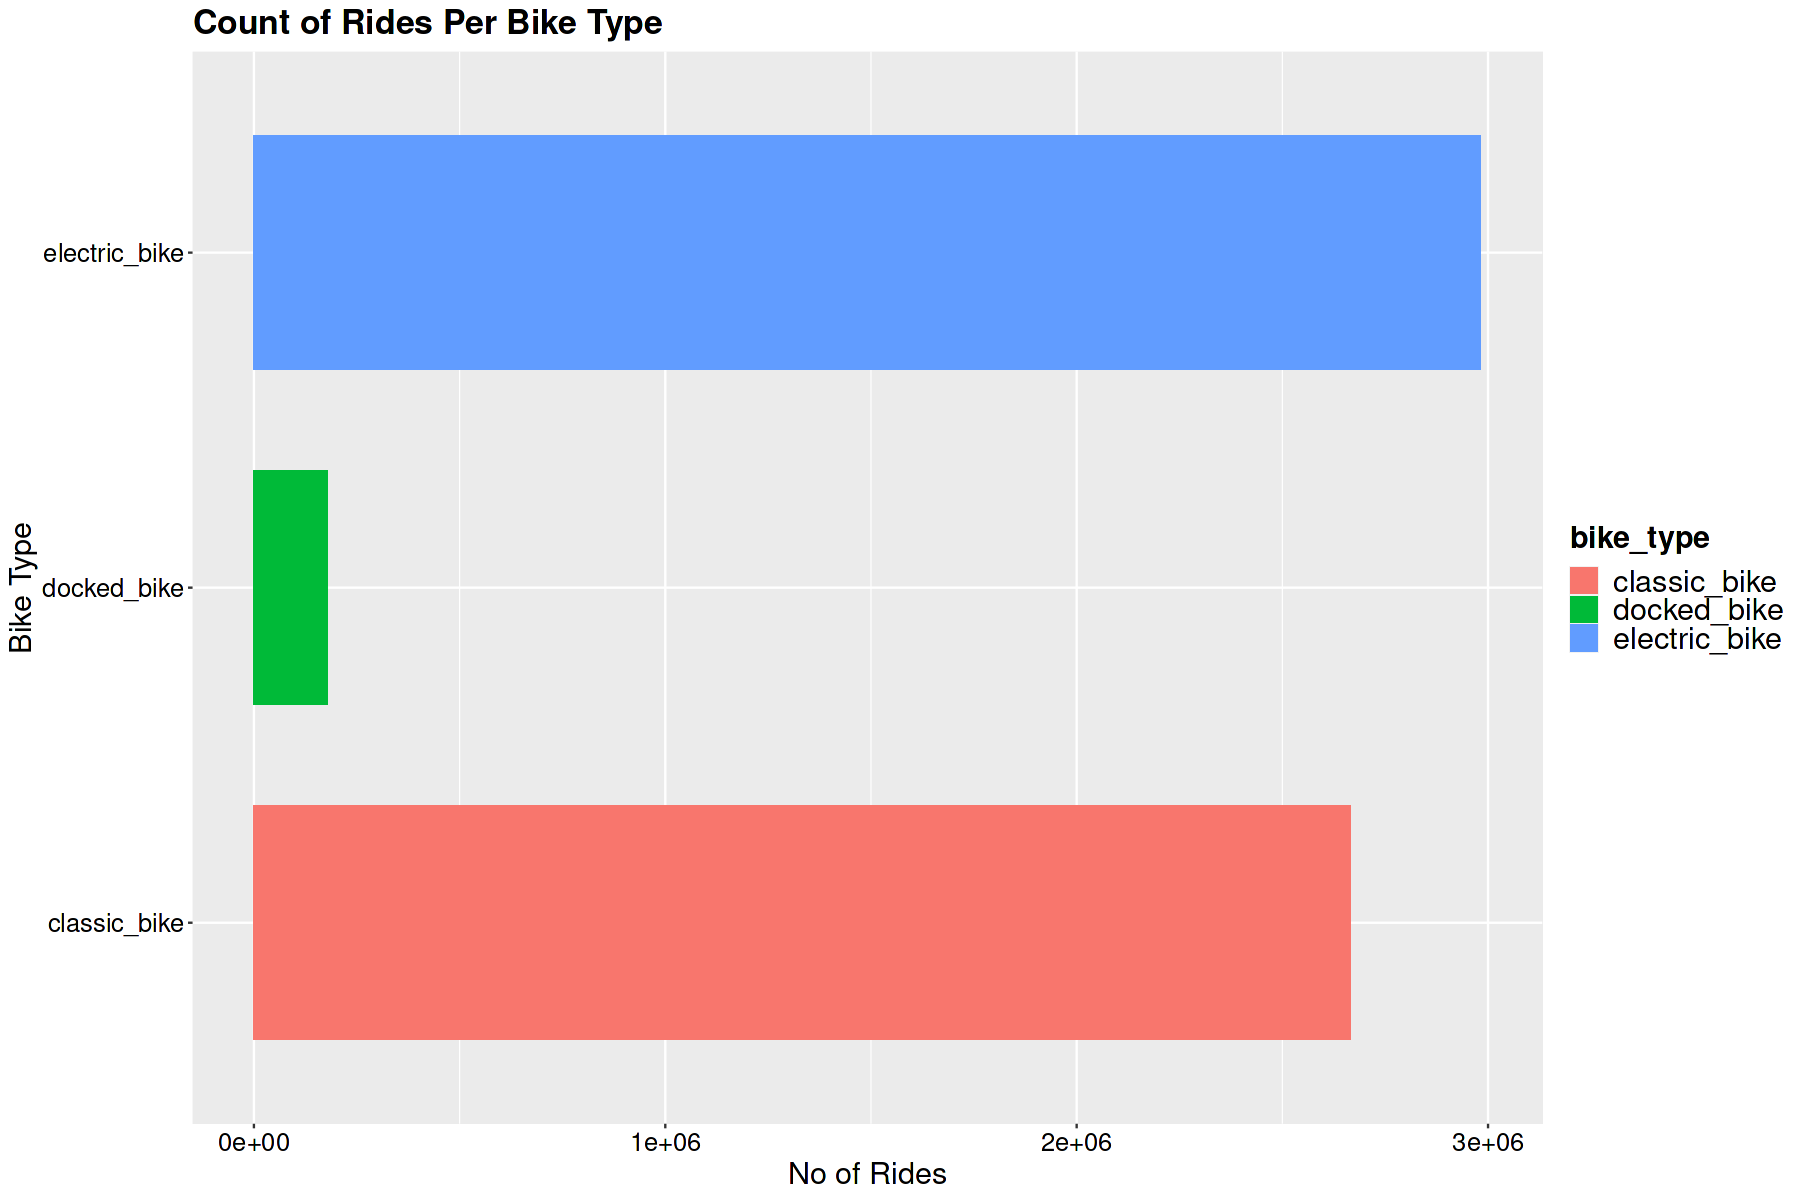

In [26]:
ggplot(df, aes(y = bike_type,fill=bike_type))+
geom_bar(stat="count", width=0.7)+
ggtitle("Count of Rides Per Bike Type")+
mynamestheme +

labs(y= "Bike Type", x = "No of Rides")

In general, there seems to be a lot of enthisiasm for the electric bike, followed by the classic bike. Let's further explore this aspect considering the member classes

#### Count of Rides For each customer type

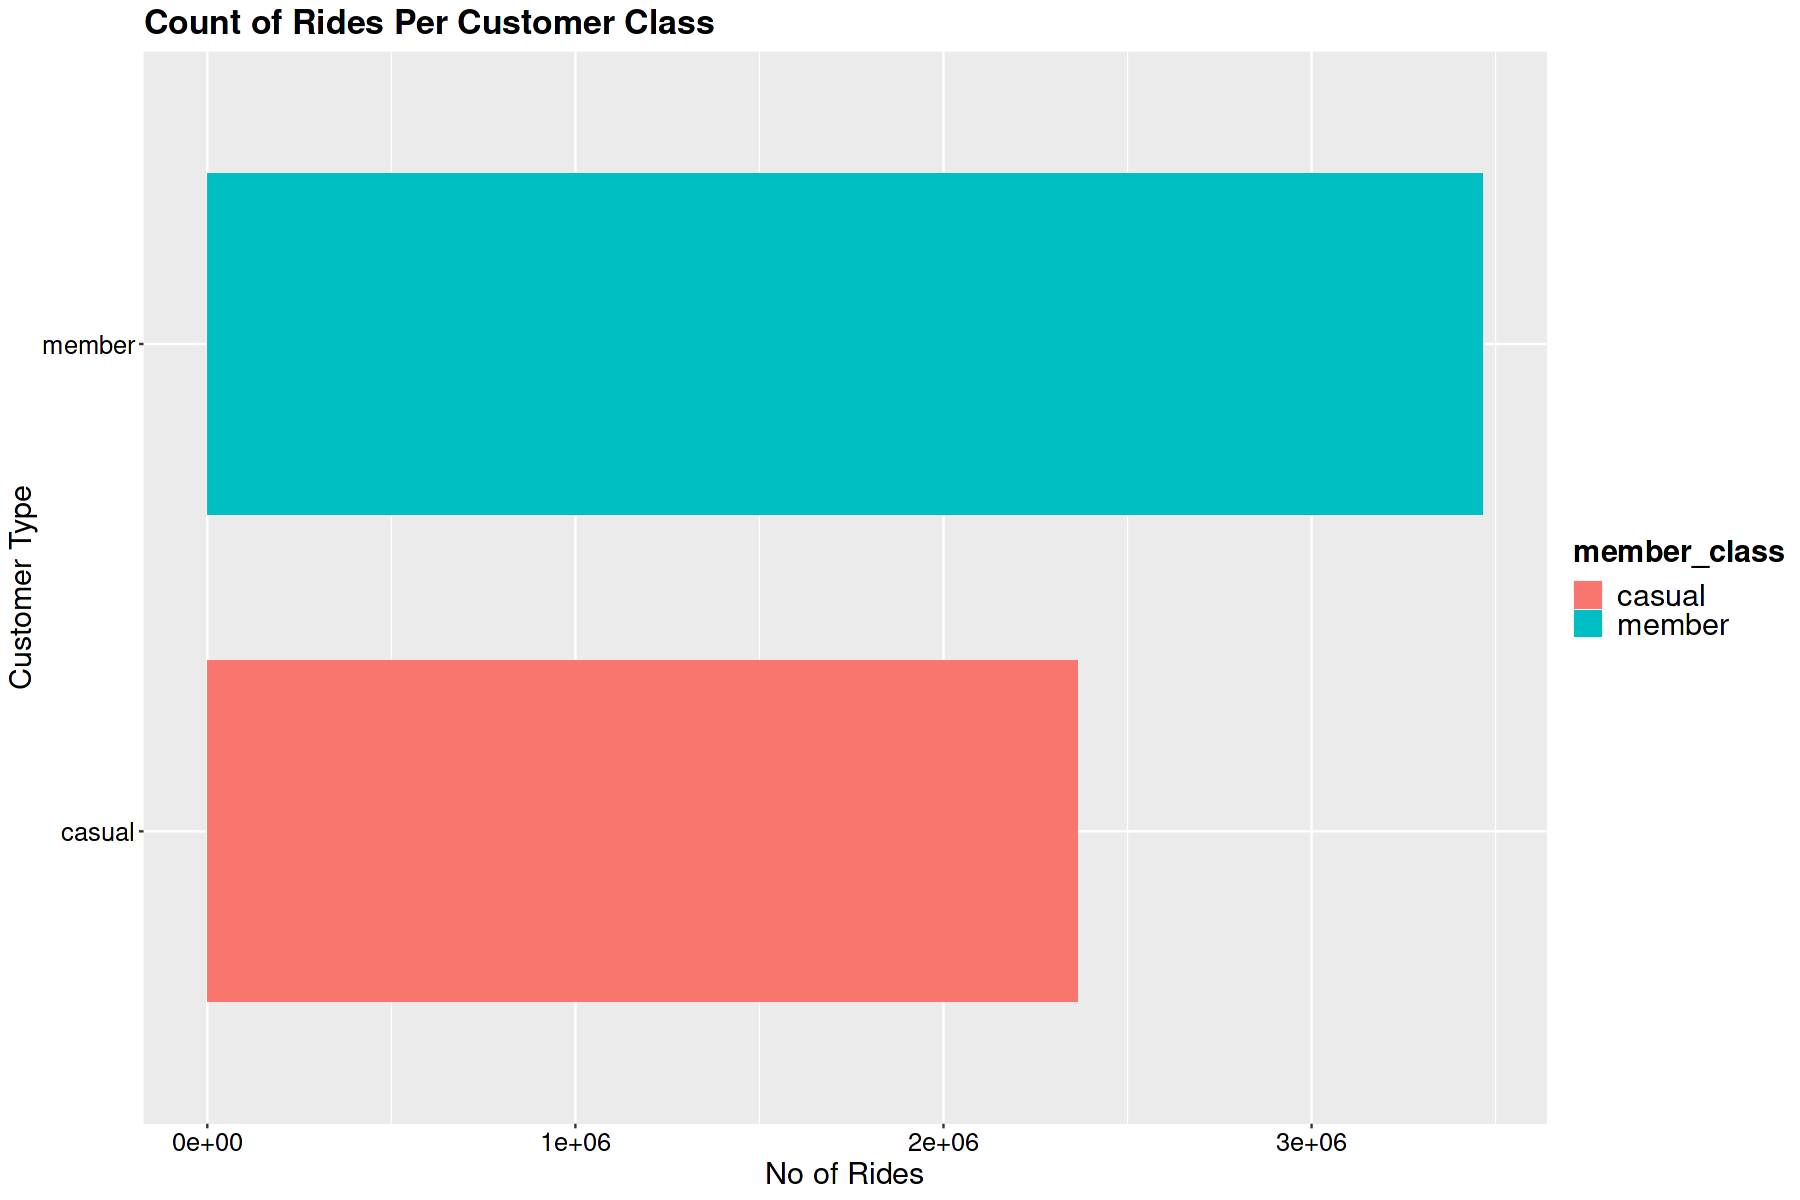

In [27]:
ggplot(df, aes(y = member_class,fill=member_class))+
geom_bar(stat="count", width=0.7)+
ggtitle("Count of Rides Per Customer Class")+
mynamestheme +

labs(y= "Customer Type", x = "No of Rides")

In [28]:
# Group by count using dplyr
member_perc <- df %>% group_by(member_class) %>% 
  summarise(total_count=100*n()/ nrow(.),
            .groups = 'drop')
member_perc

member_class,total_count
<chr>,<dbl>
casual,40.5737
member,59.4263


Approximately 59% of the of total rides are by members, with the remaining 41% being casual riders

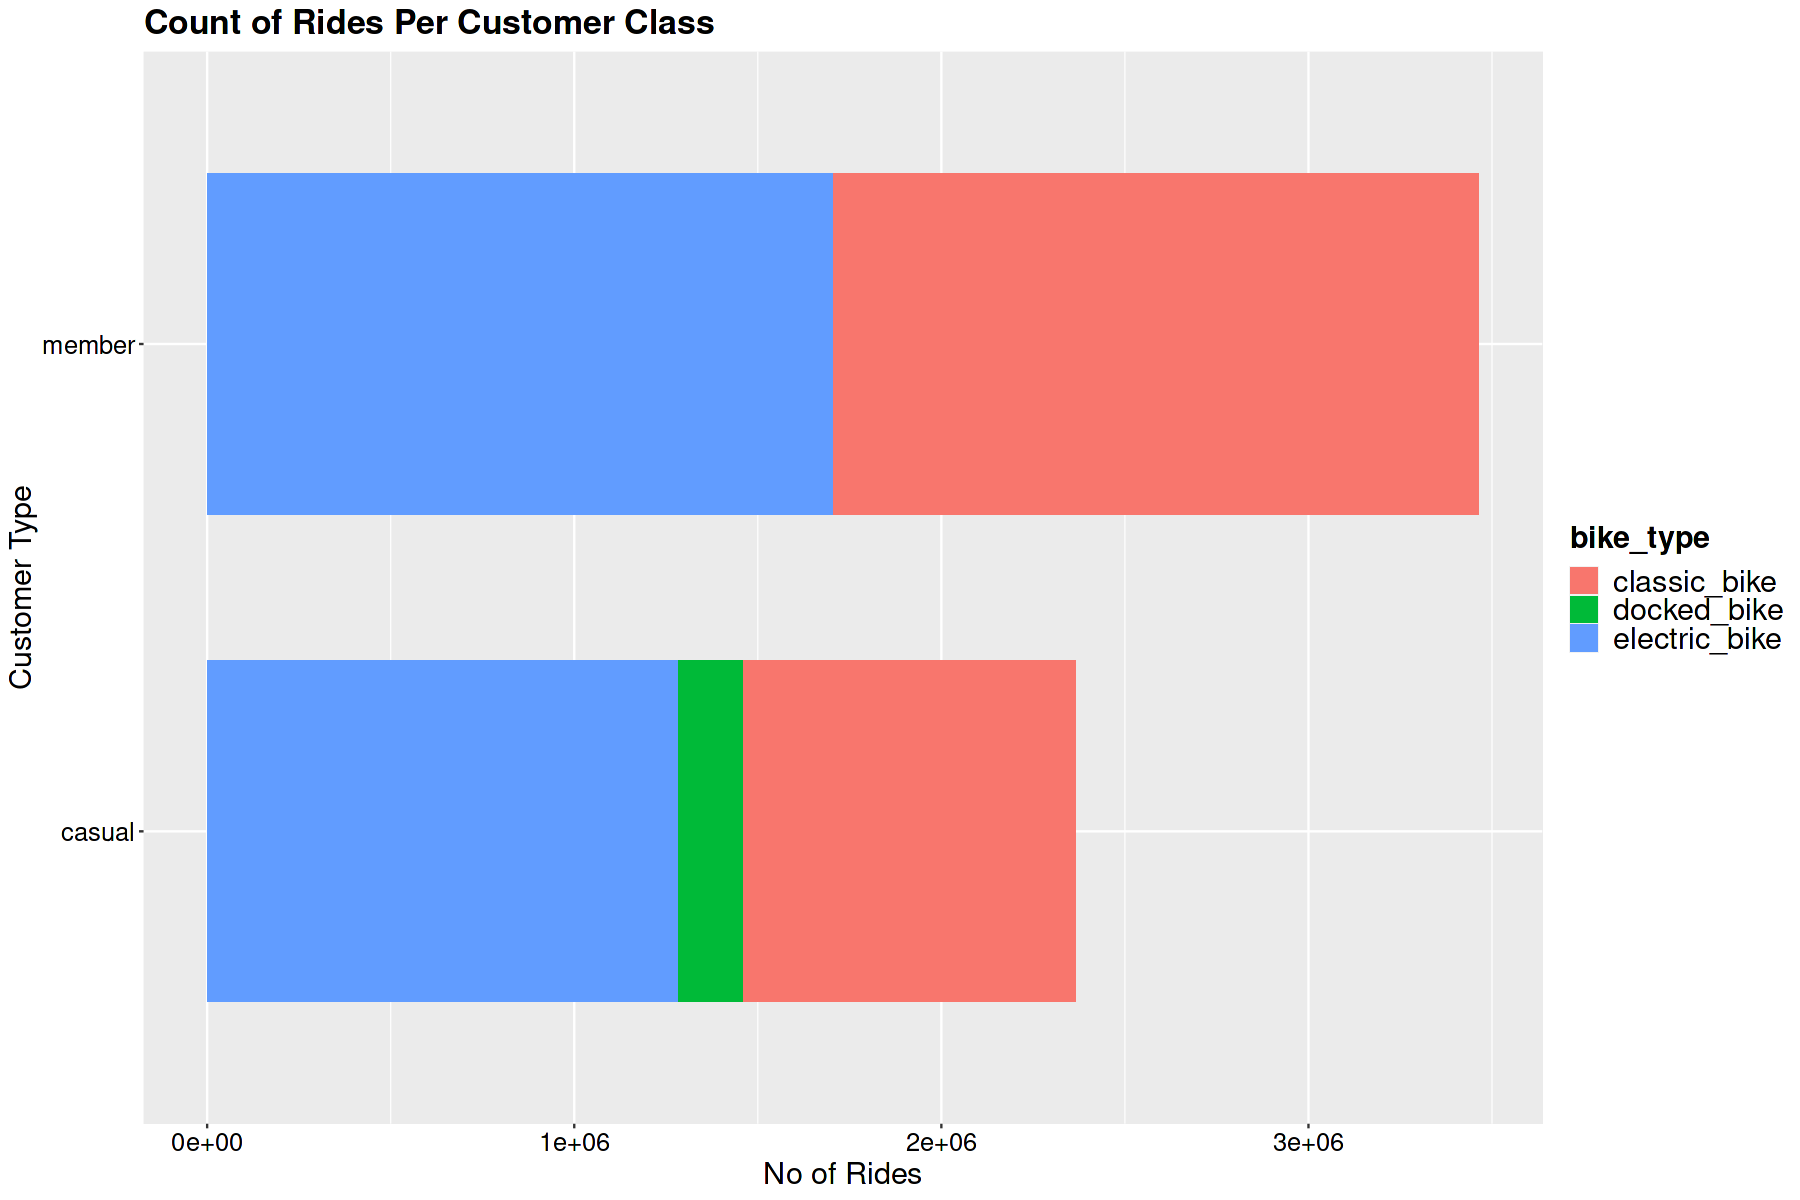

In [29]:
ggplot(df, aes(y = member_class,fill=bike_type))+

geom_bar(stat="count", width=0.7)+

ggtitle("Count of Rides Per Customer Class")+
mynamestheme +

labs(y= "Customer Type", x = "No of Rides")

In [30]:
# Percentage of members per bike type
perc_group <- df %>% group_by(member_class,bike_type) %>% 
  summarise(total_count=100*n()/ nrow(.),
            .groups = 'drop')
perc_group

member_class,bike_type,total_count
<chr>,<chr>,<dbl>
casual,classic_bike,15.540222
casual,docked_bike,3.072447
casual,electric_bike,21.961035
member,classic_bike,30.213727
member,electric_bike,29.212569


Members only seem to prefer the classic bikes and electric bikes( making up 30% and 29% of total rides), while. a small number of casual riders(3%) make use of the docked bikes

**Number of weekday rides for each member category**


In [31]:
df$weekday <- factor(df$weekday, c("Sunday","Monday", "Tuesday", "Wednesday",
                                   "Thursday","Friday", "Saturday"))


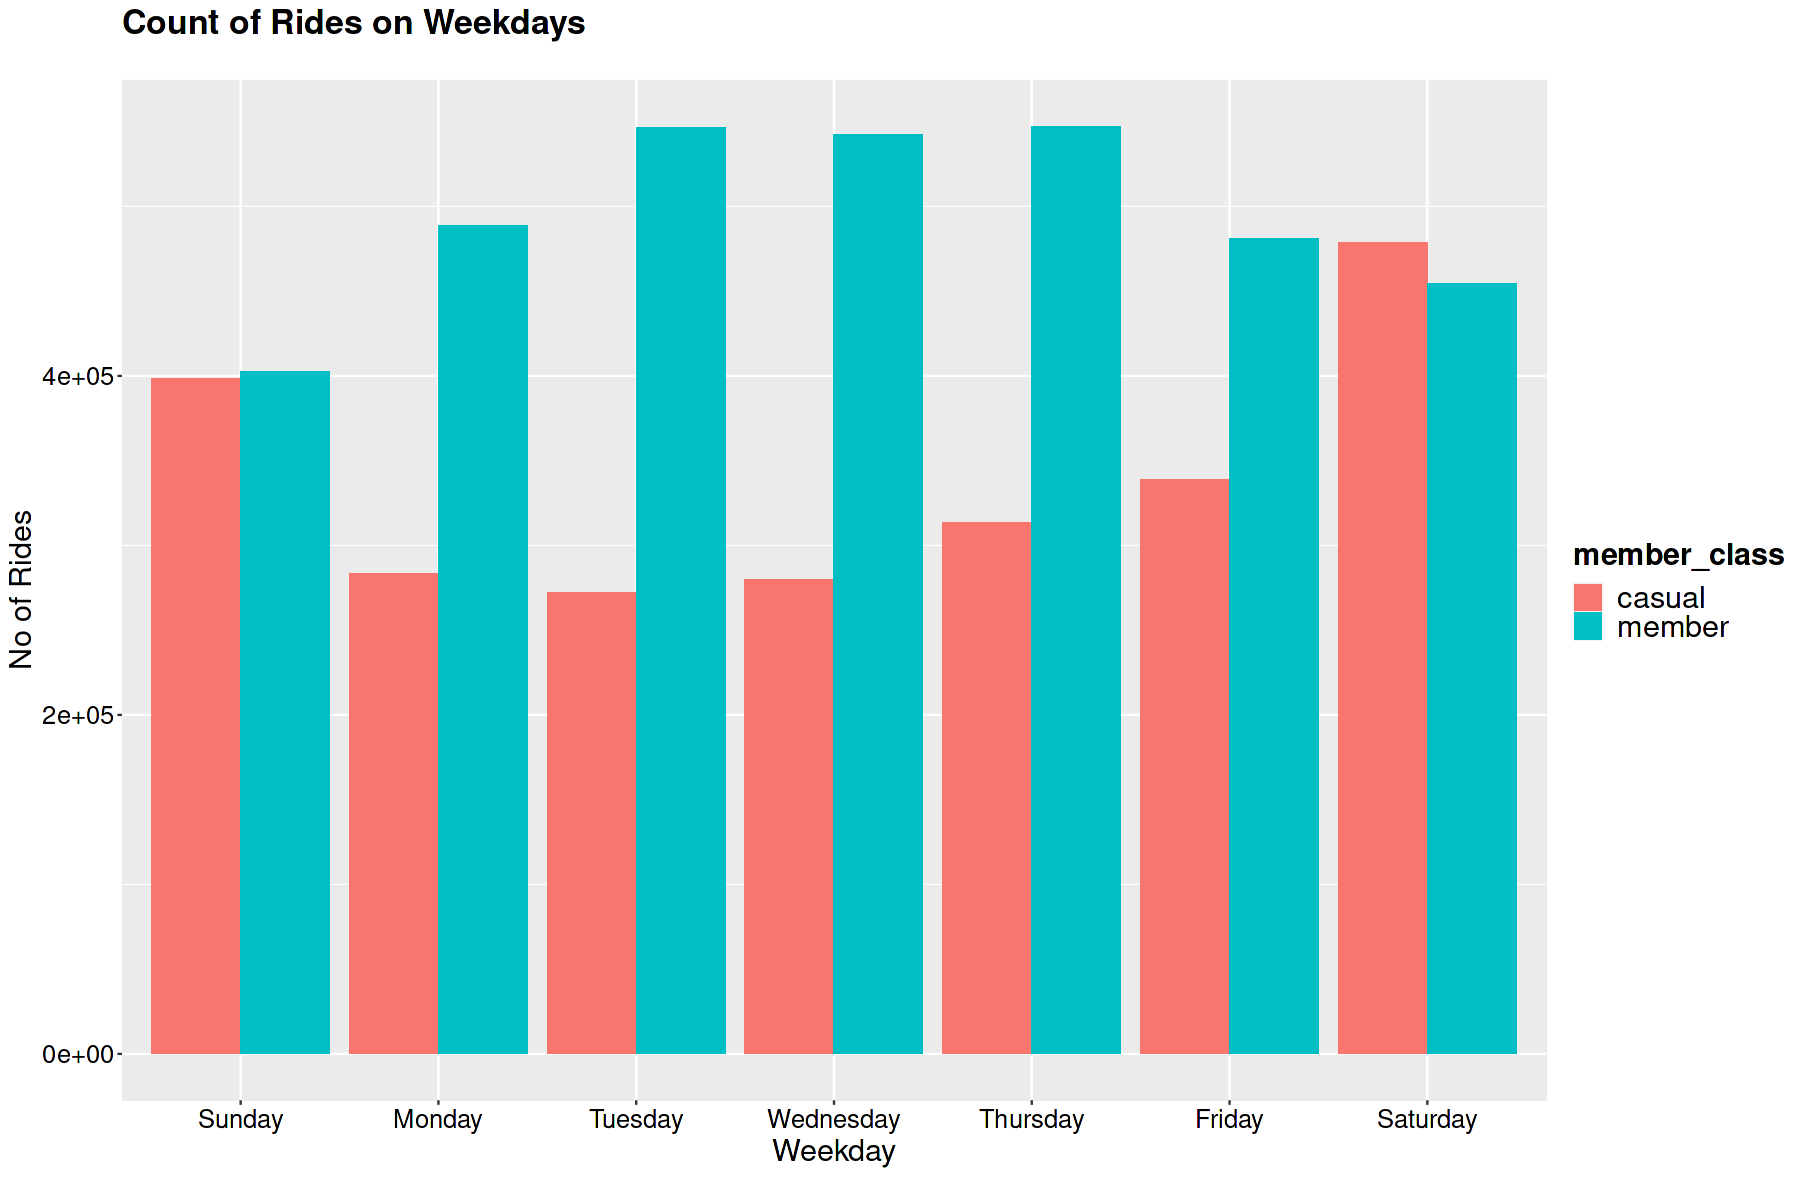

In [32]:
#Grouped bar plot
ggplot(df, aes(x = weekday, fill = member_class)) + 
  geom_bar( position = 'dodge')+
#   geom_text(stat='count', aes(label=..count..), vjust=0.1,
#   position = position_dodge(0.9), size=5)+
  labs(title = "Count of Rides on Weekdays", subtitle =" ",caption = '', 
       x="Weekday", y="No of Rides")+mynamestheme 

Member riders have very high, consistent on Tuesdays,Wednesdays and Thursdays; and is fairly consistent, with the lowest activity of Weekends. This implies that most members use the bikes on the commute to work; as opposed to casual riders who have the most activity on weekends. Let's look further into the periods within the day

**Number of rides for each member category for each day period**

In [33]:
df$day_period <- factor(df$day_period, c("Dawn","Morning", "Afternoon", "Evening",
                                   "Night"))

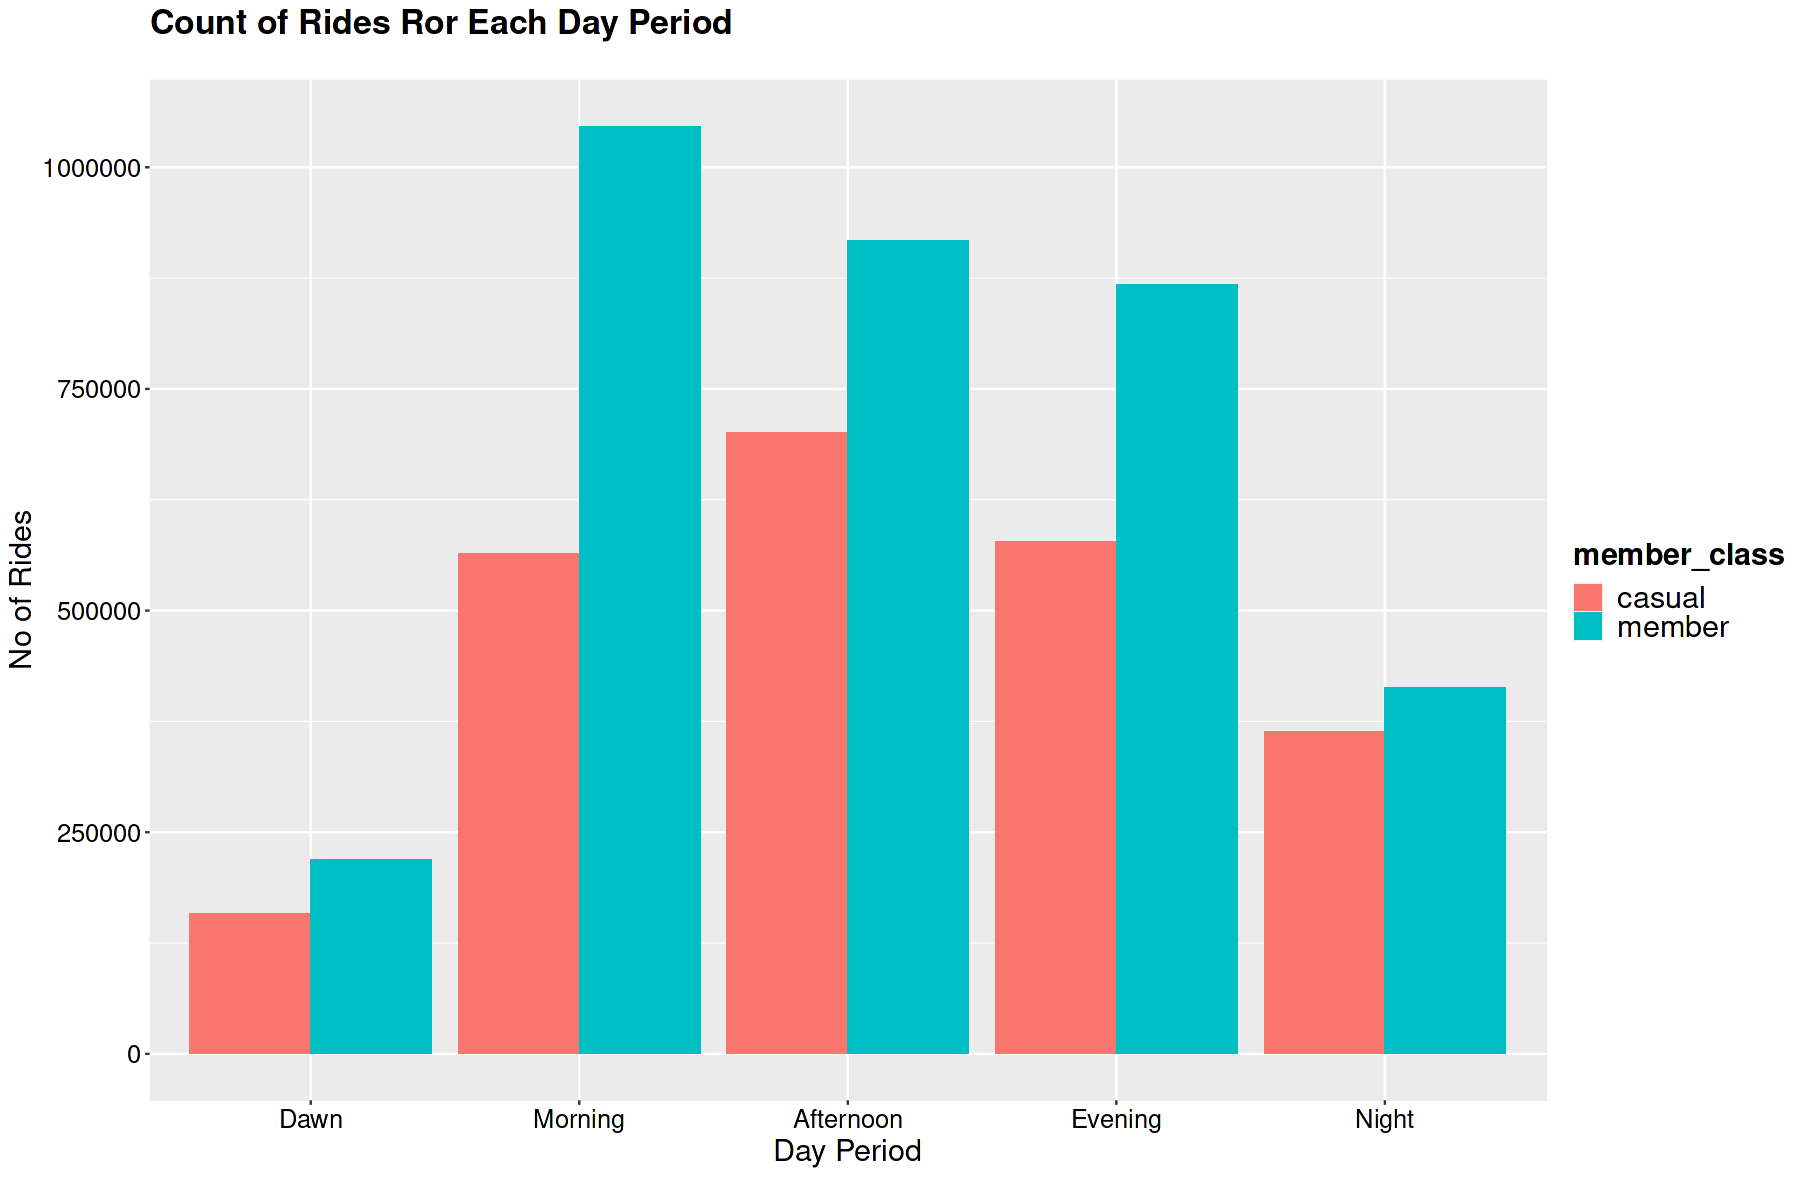

In [34]:
#Grouped bar plot
ggplot(df, aes(x = day_period, fill = member_class)) + 
  geom_bar( position = 'dodge')+
#   geom_text(stat='count', aes(label=..count..), vjust=0.1,
#   position = position_dodge(0.9), size=5)+
  labs(title = "Count of Rides Ror Each Day Period", subtitle =" ",caption = '', 
       x="Day Period", y="No of Rides")+mynamestheme 

As expected, most member rides start in the morning for the members, followed by afternoon and evenings. For the casual riders, most of the rides are in the afternoons. this further reinforces the inference that the casual riders use the bikes for casual activities , as opposed to members who probably use the bikes for the work commute.

**Number of rides for each member category for each Season**

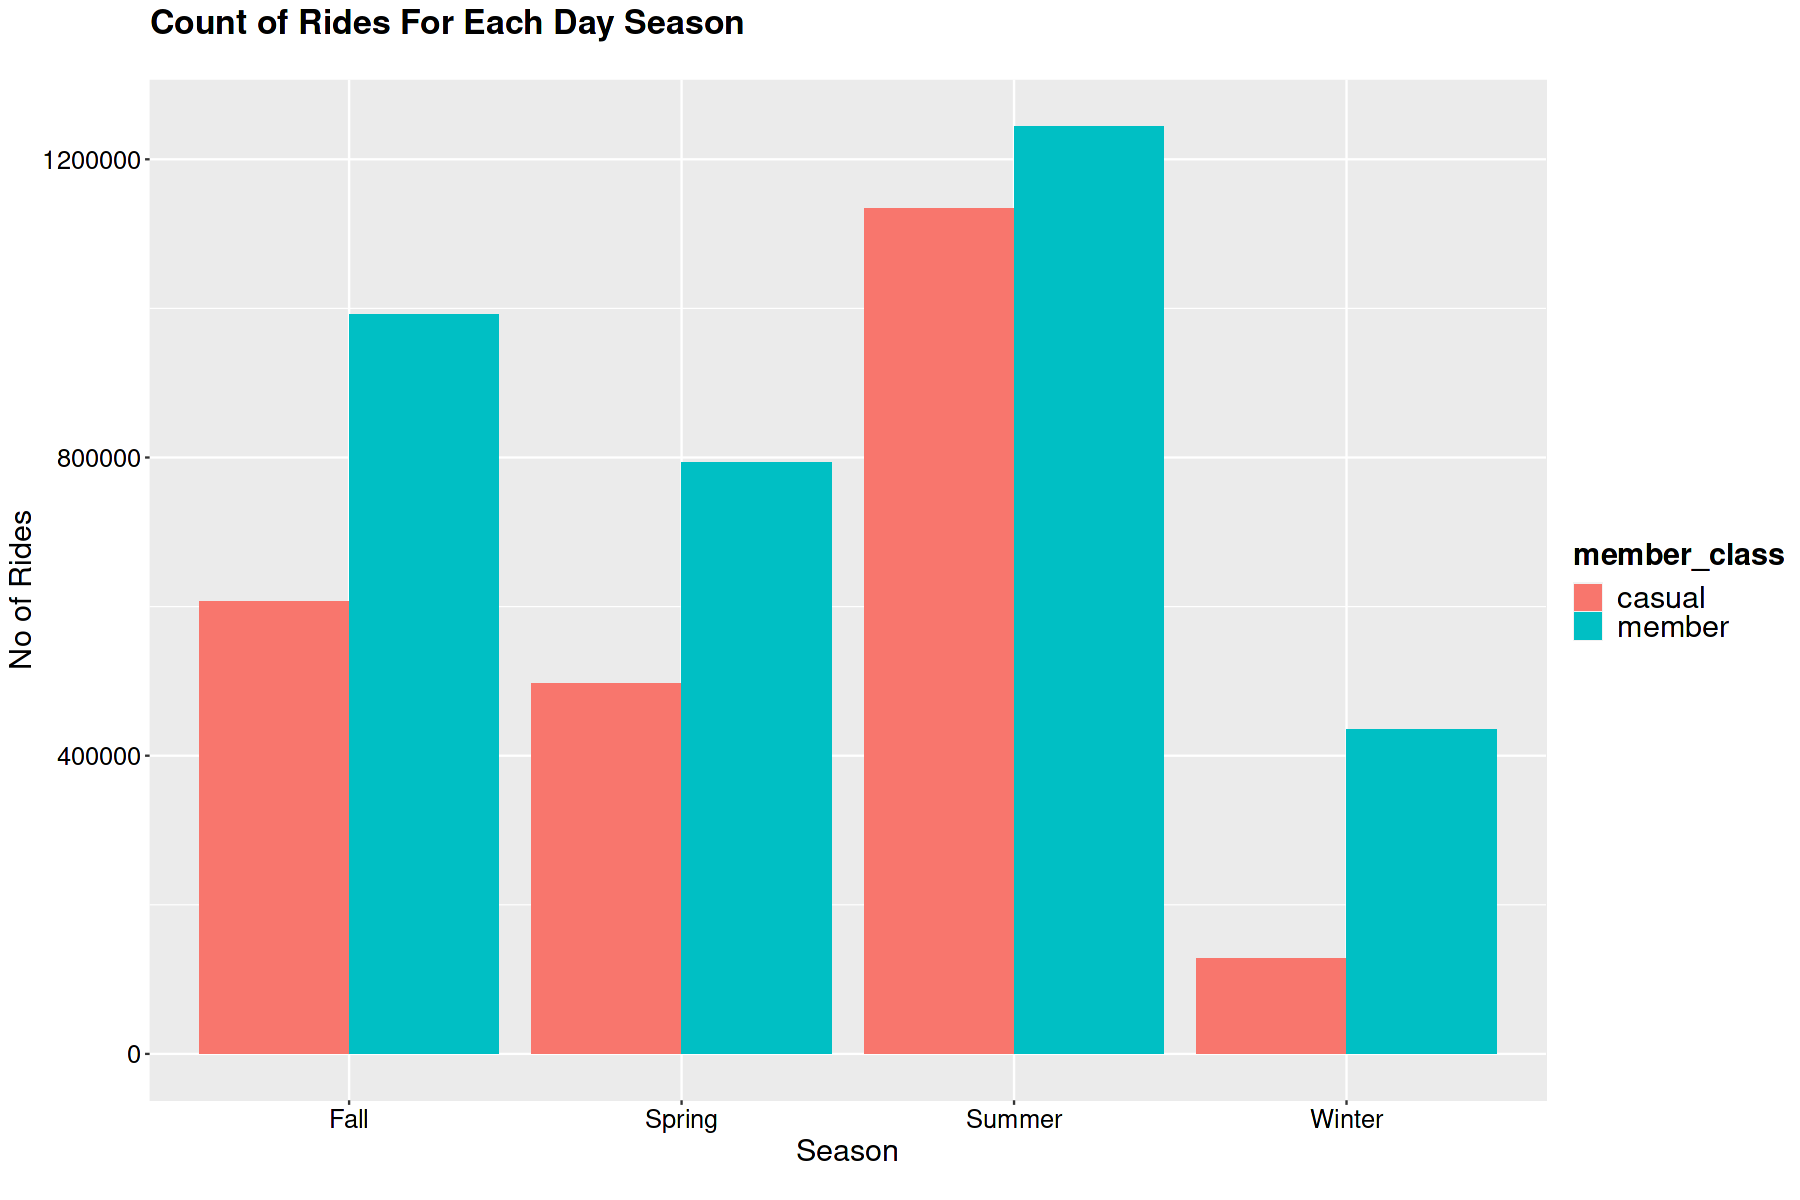

In [35]:
#Grouped bar plot
ggplot(df, aes(x = season, fill = member_class)) + 
  geom_bar( position = 'dodge')+
#   geom_text(stat='count', aes(label=..count..), vjust=0.1,
#   position = position_dodge(0.9), size=5)+
  labs(title = "Count of Rides For Each Day Season", subtitle =" ",caption = '', 
       x="Season", y="No of Rides")+mynamestheme 

No suprises here. There's more activity in the summer for both rider classes; with the least activity in the winter.

**Median duration for each member category**


In [36]:
mean_dur <- df %>%
group_by(member_class) %>% 
  summarise(median_duration_min=median(round(duration_min,digits=2)),
            .groups = 'drop')

head(mean_dur)

member_class,median_duration_min
<chr>,<dbl>
casual,12.83
member,8.73


The casual riders spend an median 12.8 minutes with the bikes, while the members spend an median of 8.7 minutes on the bikes. Note that median was used to account for possible outliers

In [37]:
mean_dur_weekday <- df %>%
group_by(member_class,weekday) %>% 
  summarise(median_duration_min=median(round(duration_min,digits=2)),
            .groups = 'drop')

head(mean_dur_weekday)

member_class,weekday,median_duration_min
<chr>,<fct>,<dbl>
casual,Sunday,14.88
casual,Monday,12.65
casual,Tuesday,11.30
casual,Wednesday,11.27
casual,Thursday,11.62
casual,Friday,12.33


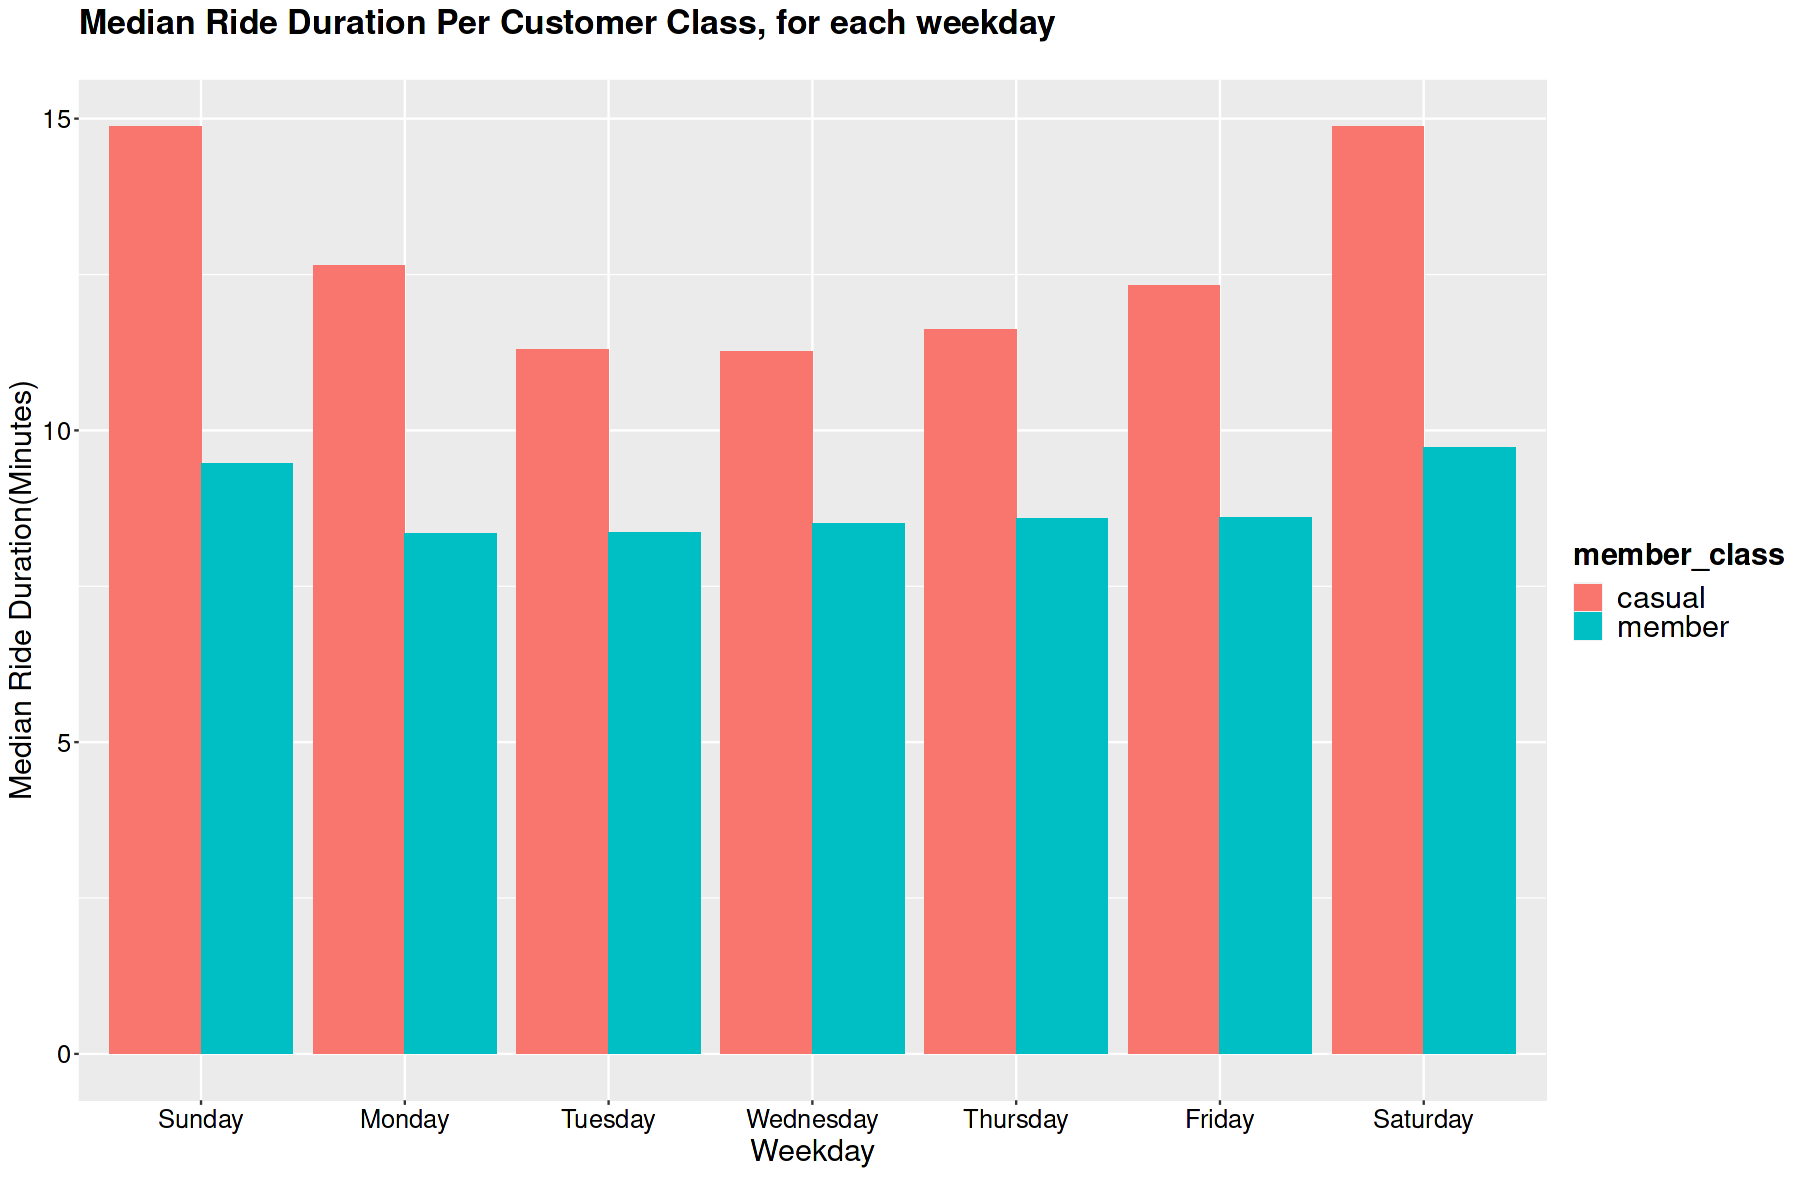

In [38]:
#Grouped bar plot
ggplot(mean_dur_weekday, aes(x = weekday,y = median_duration_min, fill = member_class)) + 
  geom_bar( stat="identity",position = 'dodge')+
#   geom_text(stat='count', aes(label=..count..), vjust=0.1,
#   position = position_dodge(0.9), size=5)+
  labs(title = "Median Ride Duration Per Customer Class, for each weekday", subtitle =" ",caption = '', 
       x="Weekday", y="Median Ride Duration(Minutes)")+mynamestheme 

Overall, the members ride for shorter times than the casual riders.
The median duration for members is fairly consistent throghout the week; only slightly higher on weekends.

As for the casual members, there is a marked longer duration in the weekend periods; further pointing to the possibility of leisure riding.


In [39]:
colnames(df)

[1] "ride_id"            "bike_type"          "ride_start"        
 [4] "ride_end"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_class"       "duration_secs"      "weekday"           
[16] "month"              "hour"               "day_period"        
[19] "season"             "duration_min"

In [40]:
# ggplot(mean_dur, aes(x=weekday,y = median_duration_min,fill=member_class))+
# geom_bar(stat="identity")+
# ggtitle("Median Ride Duration Per Customer Class, for each weekday")+

# mynamestheme +

# labs(x= "Weekday", y = "Median Ride Duration(Minutes)")

## Summary of Findings


## Proposals
* Introduce preferential weekend rates for members,in order to spur interest in membership by casual riders.
* Introduce low rates for off-peak period during the day

### Export Final Dataframe

In [40]:
colnames(df)

[1] "ride_id"            "bike_type"          "ride_start"        
 [4] "ride_end"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_class"       "duration_secs"      "weekday"           
[16] "month"              "hour"               "day_period"        
[19] "season"             "duration_min"

In [41]:
#Filter Dataframe to only include relevant columns
df_exp=df %>% select('bike_type','member_class','weekday','month','hour','day_period','season','duration_min')
colnames(df_exp)

[1] "bike_type"    "member_class" "weekday"      "month"        "hour"        
[6] "day_period"   "season"       "duration_min"

In [42]:
# Save dataframe to csv
write.csv(df_exp, "cyclistic_dat.csv", row.names=FALSE)